# yt_xarray

linking yt & xarray

* code: https://github.com/data-exp-lab/yt_xarray/
* docs: https://yt-xarray.readthedocs.io

this presentation: https://github.com/chrishavlin/yt_xarray_walkthrough_dxl 

built with: https://github.com/deathbeds/jupyterlab-deck

## xarray

Multidimensional array IO:

* self-describing data formats (netcdf, ...)

* metadata preservation, arbitrary dimension names

* distributed support (chunks to files): 
    * dask arrays 
    * zarr arrays

Load in a [GEOS](https://gmao.gsfc.nasa.gov/GEOS_systems/) dataset (~2 GB, NASA Global Modeling and Assimilation Office):

In [60]:
import xarray as xr 
import os 

fname_geos = os.path.expanduser("~/hdd/data/yt_data/yt_sample_sets/geos/GEOS.fp.asm.inst3_3d_aer_Nv.20180822_0900.V01.nc4")
ds = xr.open_dataset(fname_geos)
ds

<xarray.Dataset>
Dimensions:   (lon: 1152, lat: 721, lev: 72, time: 1)
Coordinates:
  * lon       (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
  * lat       (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lev       (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * time      (time) datetime64[ns] 2018-08-22T09:00:00
Data variables: (12/29)
    AIRDENS   (time, lev, lat, lon) float32 ...
    BCPHILIC  (time, lev, lat, lon) float32 ...
    BCPHOBIC  (time, lev, lat, lon) float32 ...
    DELP      (time, lev, lat, lon) float32 ...
    DMS       (time, lev, lat, lon) float32 ...
    DU001     (time, lev, lat, lon) float32 ...
    ...        ...
    SS001     (time, lev, lat, lon) float32 ...
    SS002     (time, lev, lat, lon) float32 ...
    SS003     (time, lev, lat, lon) float32 ...
    SS004     (time, lev, lat, lon) float32 ...
    SS005     (time, lev, lat, lon) float32 ...
    TAITIME   (time) float64 ...
Attributes: (12/28)
    Contact:               http://gmao.gsfc.nasa.gov
    History:               Original file generated: Wed Aug 22 14:21:00 2018 GMT
    Filename:              GEOS.fp.asm.inst3_3d_aer_Nv.20180822_0900.V01.nc4
    Comment:               GMAO filename: f521_fp.inst3_3d_aer_Nv.20180822_09...
    Source:                GEOSadas-5_21_2_OPS experiment_id: f521_fp
    Conventions:           CF-1
    ...                    ...
    NorthernmostLatitude:  90.0
    WesternmostLongitude:  -180.0
    EasternmostLongitude:  179.6875
    LatitudeResolution:    0.25
    LongitudeResolution:   0.3125
    DataResolution:        0.25 x 0.3125 (72 native layers)

data variable access:

In [6]:
ds.data_vars['AIRDENS']

<xarray.DataArray 'AIRDENS' (time: 1, lev: 72, lat: 721, lon: 1152)>
[59802624 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 2018-08-22T09:00:00
Attributes:
    long_name:       moist_air_density
    units:           kg m-3
    fmissing_value:  1000000000000000.0
    standard_name:   moist_air_density
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

extract dimension and coordinate info:

In [10]:
ds.AIRDENS.coords['lon']

<xarray.DataArray 'lon' (lon: 1152)>
array([-180.    , -179.6875, -179.375 , ...,  179.0625,  179.375 ,  179.6875])
Coordinates:
  * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
Attributes:
    long_name:    longitude
    units:        degrees_east
    vmax:         1000000000000000.0
    vmin:         -1000000000000000.0
    valid_range:  [-1.e+15  1.e+15]

## Data selection with xarray 

### np-style array access and slicing

In [14]:
ds.AIRDENS.dims

('time', 'lev', 'lat', 'lon')

extracting raw np arrays:

In [15]:
ds.AIRDENS[0,0,:,:].to_numpy() 

array([[2.5341093e-05, 2.5341093e-05, 2.5341093e-05, ..., 2.5341093e-05,
        2.5341093e-05, 2.5341093e-05],
       [2.5462165e-05, 2.5462165e-05, 2.5460302e-05, ..., 2.5462165e-05,
        2.5462165e-05, 2.5462165e-05],
       [2.5633528e-05, 2.5633528e-05, 2.5633528e-05, ..., 2.5633528e-05,
        2.5633528e-05, 2.5633528e-05],
       ...,
       [2.8719931e-05, 2.8719931e-05, 2.8719931e-05, ..., 2.8721794e-05,
        2.8721794e-05, 2.8721794e-05],
       [2.8764634e-05, 2.8764634e-05, 2.8764634e-05, ..., 2.8764634e-05,
        2.8764634e-05, 2.8764634e-05],
       [2.8788849e-05, 2.8788849e-05, 2.8788849e-05, ..., 2.8788849e-05,
        2.8788849e-05, 2.8788849e-05]], dtype=float32)

need to remember axis ordering!

### selection by coordinate **name**

by index (`isel`):

In [16]:
ds.AIRDENS.isel(lev=1, time=0, lat=2)

<xarray.DataArray 'AIRDENS' (lon: 1152)>
[1152 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
    lat      float64 -89.5
    lev      float64 2.0
    time     datetime64[ns] 2018-08-22T09:00:00
Attributes:
    long_name:       moist_air_density
    units:           kg m-3
    fmissing_value:  1000000000000000.0
    standard_name:   moist_air_density
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

by **exact** value (`sel`):

In [61]:
ds.AIRDENS.sel(lev=2.1, lat=-89.5)

KeyError: "not all values found in index 'lev'. Try setting the `method` keyword argument (example: method='nearest')."

with some fuzziness: 

In [62]:
ds.AIRDENS.sel(lev=2.1, method="nearest")

<xarray.DataArray 'AIRDENS' (time: 1, lat: 721, lon: 1152)>
[830592 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
    lev      float64 2.0
  * time     (time) datetime64[ns] 2018-08-22T09:00:00
Attributes:
    long_name:       moist_air_density
    units:           kg m-3
    fmissing_value:  1000000000000000.0
    standard_name:   moist_air_density
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

finally, with dictionary:

In [19]:
ds.AIRDENS.sel({"lev":2.0, "lat":-89.0})  # important for yt_xarray!

<xarray.DataArray 'AIRDENS' (time: 1, lon: 1152)>
[1152 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
    lat      float64 -89.0
    lev      float64 2.0
  * time     (time) datetime64[ns] 2018-08-22T09:00:00
Attributes:
    long_name:       moist_air_density
    units:           kg m-3
    fmissing_value:  1000000000000000.0
    standard_name:   moist_air_density
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

## xarray & dask 

In [20]:
ds.close()
del ds

Start dask client

In [21]:
from dask.distributed import Client
c = Client(n_workers=os.cpu_count()-2, threads_per_worker=1)

Test data set ([generated from here](https://github.com/chrishavlin/yt-xarray-dask-sandbox/blob/main/example.ipynb)):
* random field data 
* 1000 chunks
* 1 chunk = 1 .nc file

In [22]:
data_dir = os.path.expanduser("~/hdd/data/yt_data/yt_sample_sets/yt_xarray_test_data/dask_mf/data")
dask_test_ds = os.path.join(data_dir, "*.nc")
ds = xr.open_mfdataset(dask_test_ds)
ds

<xarray.Dataset>
Dimensions:      (x: 510, y: 510, z: 510)
Coordinates:
  * x            (x) float64 0.009804 0.02941 0.04902 ... 9.951 9.971 9.99
  * y            (y) float64 0.009804 0.02941 0.04902 ... 9.951 9.971 9.99
  * z            (z) float64 0.009804 0.02941 0.04902 ... 9.951 9.971 9.99
Data variables:
    temperature  (x, y, z) float64 dask.array<chunksize=(51, 51, 51), meta=np.ndarray>
    gauss        (x, y, z) float64 dask.array<chunksize=(51, 51, 51), meta=np.ndarray>
    xvals        (x, y, z) float64 dask.array<chunksize=(51, 51, 51), meta=np.ndarray>
    yvals        (x, y, z) float64 dask.array<chunksize=(51, 51, 51), meta=np.ndarray>
    zvals        (x, y, z) float64 dask.array<chunksize=(51, 51, 51), meta=np.ndarray>

In [23]:
ds.temperature

<xarray.DataArray 'temperature' (x: 510, y: 510, z: 510)>
dask.array<concatenate, shape=(510, 510, 510), dtype=float64, chunksize=(51, 51, 51), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 0.009804 0.02941 0.04902 0.06863 ... 9.951 9.971 9.99
  * y        (y) float64 0.009804 0.02941 0.04902 0.06863 ... 9.951 9.971 9.99
  * z        (z) float64 0.009804 0.02941 0.04902 0.06863 ... 9.951 9.971 9.99

* **Coordinates** are in memory and over all chunks!
* **Data variables** are dask arrays

**Returning in-memory values:**

In [24]:
ds.temperature.mean()

<xarray.DataArray 'temperature' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [25]:
ds.temperature.mean().values  # equivalent to .compute()

array(10.00039071)

In [27]:
ds.temperature.mean().load()  # to preserve xarray-ness

<xarray.DataArray 'temperature' ()>
array(10.00039071)

**selections are also delayed:**

In [28]:
vals = ds.temperature.isel(z=range(10)).sel(x=1, y=2, method="nearest")
vals

<xarray.DataArray 'temperature' (z: 10)>
dask.array<getitem, shape=(10,), dtype=float64, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
    x        float64 1.01
    y        float64 2.01
  * z        (z) float64 0.009804 0.02941 0.04902 ... 0.1471 0.1667 0.1863

In [29]:
vals.load()

<xarray.DataArray 'temperature' (z: 10)>
array([ 6.27709971, 13.92521812, 17.4498013 ,  5.31102801,  9.94342828,
       11.81263997, 17.56003376, 17.18767485,  1.94899621,  7.55935721])
Coordinates:
    x        float64 1.01
    y        float64 2.01
  * z        (z) float64 0.009804 0.02941 0.04902 ... 0.1471 0.1667 0.1863

## what about yt?



previously:

1. load in arrays in memory via xarray 
2. use yt generic data loader (`yt.load_uniform_grid(...)`)


**yt_xarray** v0.1.1: yt datasets from xarray datasets

automate (as much as possible) 1 & 2 !

## **yt_xarray** usage overview

yt_xarray provides a `yt` "accessor object":

In [30]:
import yt_xarray

In [31]:
ds.yt

In [33]:
ds.yt.load_grid?

Signature:
ds.yt.load_grid(
    fields: Optional[List[str]] = None,
    geometry: str = None,
    use_callable: bool = True,
    sel_dict: Optional[dict] = None,
    sel_dict_type: Optional[str] = 'isel',
    chunksizes: Optional[int] = None,
    **kwargs,
)
Docstring:
Initializes a yt gridded dataset for the supplied fields.

Parameters
----------
fields : list[str]
    list of fields to include. If None, will try to use all fields

geometry : str
    the geometry to pass to yt.load_uniform grid. If not provided,
    will attempt to infer.

use_callable : bool
    if True (default), then the yt dataset will utilize links to the open
    xarray Dataset handle to avoid copying memory.

sel_dict: dict
    an optional selection dictionary to apply to the fields before yt dataset
    initialization

sel_dict_type: str
    either "isel" (default) or "sel" to indicate index or value selection for
    sel_dict.

kwargs :
    any additional keyword arguments to pass to yt.load_uniform_grid

Re

`ds.yt.load_grid`: yt `ds` from xr subset

### Loading all data (not always possible):

In [34]:
ds_yt = ds.yt.load_grid(length_unit="km")

yt_xarray : [INFO ] 2023-02-22 13:17:23,779:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2023-02-22 13:17:23,780:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt : [INFO     ] 2023-02-22 13:17:23,851 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-02-22 13:17:23,853 Parameters: domain_dimensions         = [510 510 510]
yt : [INFO     ] 2023-02-22 13:17:23,854 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-22 13:17:23,856 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2023-02-22 13:17:23,857 Parameters: cosmological_simulation   = 0


In [35]:
ds_yt.field_list

[('stream', 'gauss'),
 ('stream', 'temperature'),
 ('stream', 'xvals'),
 ('stream', 'yvals'),
 ('stream', 'zvals')]

yt : [INFO     ] 2023-02-22 13:17:48,088 xlim = -2.000000 8.000000
yt : [INFO     ] 2023-02-22 13:17:48,089 ylim = -2.000000 8.000000
yt : [INFO     ] 2023-02-22 13:17:48,090 xlim = -2.000000 8.000000
yt : [INFO     ] 2023-02-22 13:17:48,090 ylim = -2.000000 8.000000
yt : [INFO     ] 2023-02-22 13:17:48,098 Making a fixed resolution buffer of (('stream', 'gauss')) 800 by 800



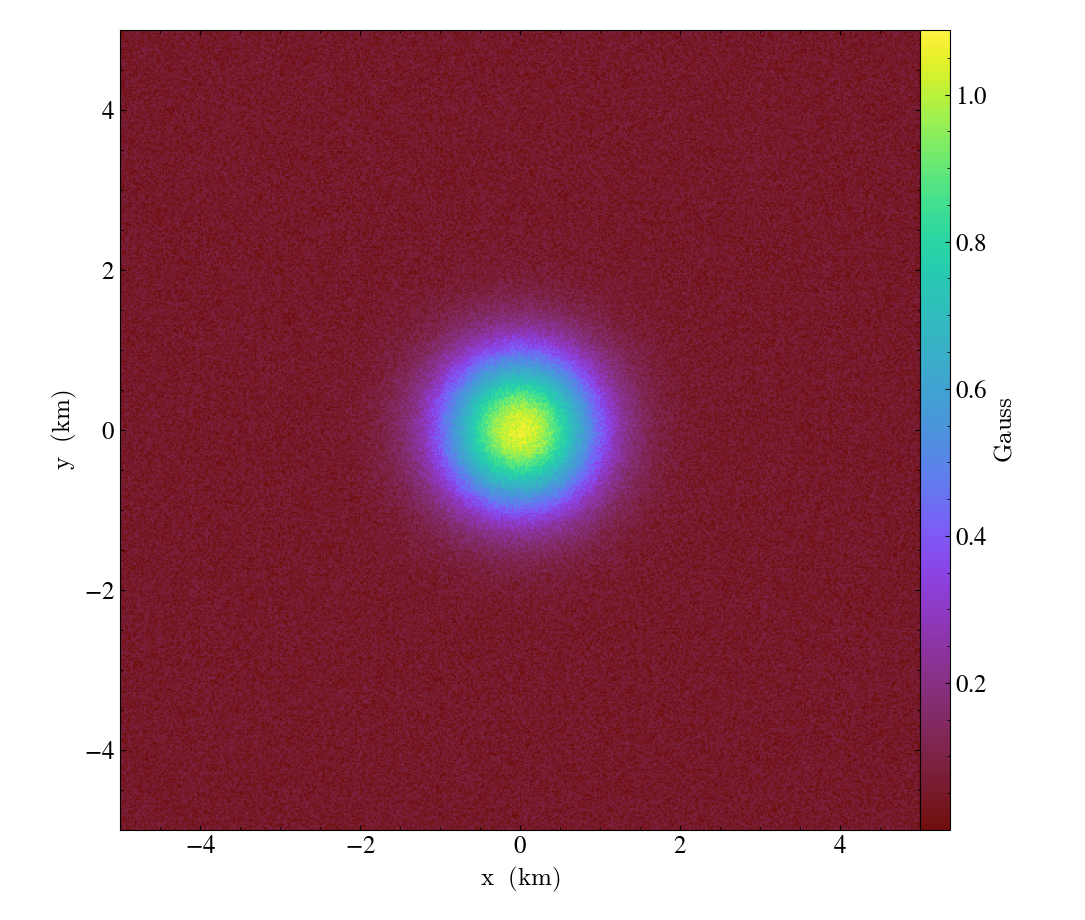

In [36]:
import yt
slc = yt.SlicePlot(ds_yt, "z", ("stream", "gauss"), center = ds_yt.arr([3., 3., 3.], 'code_length'))
slc.set_log(("stream", "gauss"), False)
slc.show()

### not always so easy...

[**wrf**](https://www.mmm.ucar.edu/models/wrf): "weather research and forecasting" model

cf (Climate and Forecast) compliance of netcdf files: https://cfconventions.org/



wrf is **not** cf compliant...

In [37]:
ds = yt_xarray.open_dataset('wrf/wrfout_d03_2016-06-01.nc')  # checks yt paths
ds

<xarray.Dataset>
Dimensions:                (Time: 24, south_north: 252, west_east: 252,
                            bottom_top: 39, bottom_top_stag: 40,
                            soil_layers_stag: 4, west_east_stag: 253,
                            south_north_stag: 253, seed_dim_stag: 2)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag, seed_dim_stag
Data variables: (12/155)
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 ...
    PC                     (Time, south_north, west_east) float32 ...
    LANDMASK               (Time, south_north, west_east) float32 ...
    LAKEMASK               (Time, south_north, west_east) float32 ...
    SST                    (Time, south_north, west_east) float32 ...
    SST_INPUT              (Time, south_north, west_east) float32 ...
Attributes: (12/132)
    TITLE:                            OUTPUT FROM WRF V4.2 MODEL
    START_DATE:                      2016-06-01_00:00:00
    SIMULATION_START_DATE:           2016-06-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        253
    SOUTH-NORTH_GRID_DIMENSION:      253
    BOTTOM-TOP_GRID_DIMENSION:       40
    ...                              ...
    ISLAKE:                          -1
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [38]:
import xwrf  

In [40]:
ds_x = ds.xwrf.postprocess()  # make it cf-compliant-ish
ds_x

<xarray.Dataset>
Dimensions:                    (Time: 24, y: 252, x: 252, soil_layers_stag: 4,
                                z: 39, x_stag: 253, y_stag: 253, z_stag: 40,
                                seed_dim_stag: 2)
Coordinates: (12/15)
    XLAT                       (y, x) float32 40.61 40.61 40.61 ... 42.87 42.87
    XLONG                      (y, x) float32 -89.16 -89.15 ... -86.15 -86.14
    XTIME                      (Time) timedelta64[ns] 00:00:00 ... 23:00:00
    XLAT_U                     (y, x_stag) float32 40.61 40.61 ... 42.87 42.87
    XLONG_U                    (y, x_stag) float32 -89.16 -89.15 ... -86.13
    XLAT_V                     (y_stag, x) float32 40.6 40.6 ... 42.87 42.87
    ...                         ...
  * z_stag                     (z_stag) float32 1.0 0.9965 0.994 ... 0.01 0.0
  * Time                       (Time) datetime64[ns] 2016-06-01 ... 2016-06-0...
  * y_stag                     (y_stag) float64 -1.02e+05 -1.01e+05 ... 1.5e+05
  * x                          (x) float64 -1.345e+05 -1.335e+05 ... 1.165e+05
  * y                          (y) float64 -1.015e+05 -1.005e+05 ... 1.495e+05
  * x_stag                     (x_stag) float64 -1.35e+05 -1.34e+05 ... 1.17e+05
Dimensions without coordinates: soil_layers_stag, seed_dim_stag
Data variables: (12/154)
    Times                      (Time) |S19 b'2016-06-01_00:00:00' ... b'2016-...
    LU_INDEX                   (Time, y, x) float32 ...
    ZS                         (Time, soil_layers_stag) float32 ...
    DZS                        (Time, soil_layers_stag) float32 ...
    VAR_SSO                    (Time, y, x) float32 ...
    U                          (Time, z, y, x_stag) float32 ...
    ...                         ...
    air_pressure               (Time, z, y, x) float32 9.83e+04 ... 1.045e+04
    geopotential               (Time, z_stag, y, x) float32 2.322e+03 ... 1.6...
    geopotential_height        (Time, z_stag, y, x) float32 236.7 ... 1.646e+04
    wind_east                  (Time, z, y, x) float32 -1.18 -1.176 ... 10.04
    wind_north                 (Time, z, y, x) float32 5.054 5.055 ... 11.11
    wrf_projection             object +proj=lcc +x_0=0 +y_0=0 +a=6370000 +b=6...
Attributes: (12/132)
    TITLE:                            OUTPUT FROM WRF V4.2 MODEL
    START_DATE:                      2016-06-01_00:00:00
    SIMULATION_START_DATE:           2016-06-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        253
    SOUTH-NORTH_GRID_DIMENSION:      253
    BOTTOM-TOP_GRID_DIMENSION:       40
    ...                              ...
    ISLAKE:                          -1
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

Hits all of the yt_xarray challenges:

1. different dimensionality of fields (including time)
2. yt has strict coordinate names (latitude, longitude, altitude), (x, y, z), (r, theta, phi), etc.

### choose a subset of fields

In [42]:

ds_x.yt.load_grid(
    fields=('geopotential', 'geopotential_height')
)

NotImplementedError: Loading data with time as a dimension is not currently supported. Please provide a selection dictionary to select a single time to load.

### choose a time to load

In [43]:
ds_yt = ds_x.yt.load_grid(
    fields=('geopotential', 'geopotential_height'),                      
    sel_dict={'Time':0})

ValueError: z_stag is not a known coordinate. To load in yt, you must supply an alias via the yt_xarray.known_coord_aliases dictionary.

### COORDINATE ALIASING

In [46]:
yt_xarray.known_coord_aliases

{'altitude': 'altitude',
 'height': 'altitude',
 'level': 'altitude',
 'lev': 'altitude',
 'latitude': 'latitude',
 'lat': 'latitude',
 'longitude': 'longitude',
 'lon': 'longitude',
 'z_stag': 'z'}

In [45]:
yt_xarray.known_coord_aliases["z_stag"] = "z"

In [47]:
ds_yt = ds_x.yt.load_grid(fields=('geopotential', 'geopotential_height'),
                          sel_dict={'Time':0},
                          length_unit='m',
                          use_callable=False)

yt_xarray : [INFO ] 2023-02-22 13:23:54,086:  Inferred geometry type is cartesian. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2023-02-22 13:23:54,088:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2023-02-22 13:23:54,089:      stretched grid detected: yt_xarray will interpolate.
yt : [INFO     ] 2023-02-22 13:23:54,384 Parameters: current_time              = 1.4647392e+18
yt : [INFO     ] 2023-02-22 13:23:54,386 Parameters: domain_dimensions         = [ 39 251 251]
yt : [INFO     ] 2023-02-22 13:23:54,387 Parameters: domain_left_edge          = [      0.         -101500.36132865 -134499.3274438 ]
yt : [INFO     ] 2023-02-22 13:23:54,388 Parameters: domain_right_edge         = [1.00000000e+00 1.49499639e+05 1.16500673e+05]
yt : [INFO     ] 2023-02-22 13:23:54,389 Parameters: cosmological_simulation   = 0


separate problem with the 3d data (bug: interpolation going wrong)... so:

In [48]:
ds_yt = ds_x.yt.load_grid(fields=('geopotential', 'geopotential_height'),
                          sel_dict={'Time':0, 'z_stag':4},
                          length_unit='m')   

yt_xarray : [INFO ] 2023-02-22 13:24:21,439:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2023-02-22 13:24:21,440:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt : [INFO     ] 2023-02-22 13:24:21,487 Parameters: current_time              = 1.4647392e+18
yt : [INFO     ] 2023-02-22 13:24:21,487 Parameters: domain_dimensions         = [252 252   1]
yt : [INFO     ] 2023-02-22 13:24:21,488 Parameters: domain_left_edge          = [-1.02000361e+05 -1.34999327e+05 -5.00000000e-01]
yt : [INFO     ] 2023-02-22 13:24:21,489 Parameters: domain_right_edge         = [1.49999639e+05 1.17000673e+05 5.00000000e-01]
yt : [INFO     ] 2023-02-22 13:24:21,490 Parameters: cosmological_simulation   = 0


finally ... 

yt : [INFO     ] 2023-02-22 13:25:13,247 xlim = -134999.327444 117000.672556
yt : [INFO     ] 2023-02-22 13:25:13,248 ylim = -102000.361329 149999.638671
yt : [INFO     ] 2023-02-22 13:25:13,251 xlim = -134999.327444 117000.672556
yt : [INFO     ] 2023-02-22 13:25:13,252 ylim = -102000.361329 149999.638671
yt : [INFO     ] 2023-02-22 13:25:13,254 Making a fixed resolution buffer of (('stream', 'geopotential_height')) 800 by 800



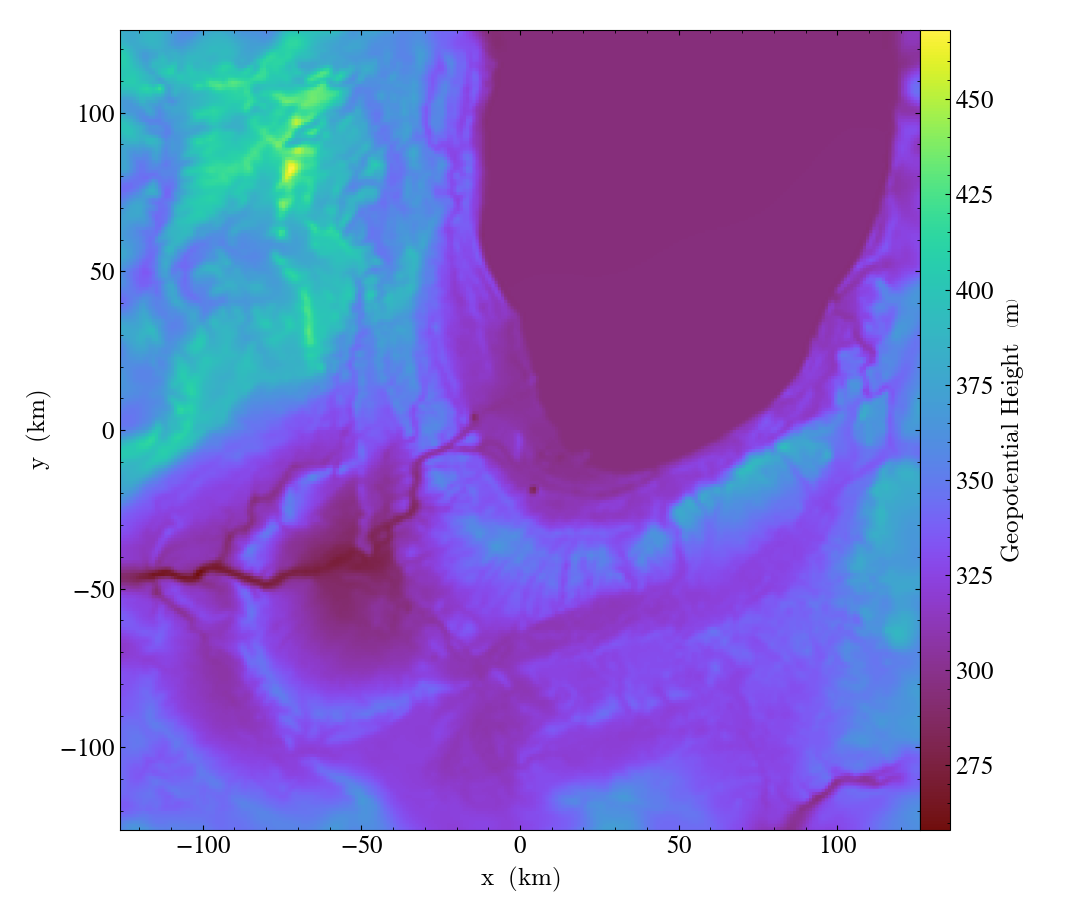

In [50]:
slc = yt.SlicePlot(ds_yt, "z", ("stream", "geopotential_height"))
slc.set_log("all", False)

**Note**: need to use yt coordinate names for yt functions

**What is [geopotential height](https://legacy.climate.ncsu.edu/images/climate/enso/geo_heights.php)?**: 

* cold air denser than warm air 
* pressure in the atmo from overlying air

geopotential height = the altitude to get to a particular pressure


### yt_xarray chunking

load back our dask-xarray ds... 

In [51]:
ds = xr.open_mfdataset(dask_test_ds)
ds

<xarray.Dataset>
Dimensions:      (x: 510, y: 510, z: 510)
Coordinates:
  * x            (x) float64 0.009804 0.02941 0.04902 ... 9.951 9.971 9.99
  * y            (y) float64 0.009804 0.02941 0.04902 ... 9.951 9.971 9.99
  * z            (z) float64 0.009804 0.02941 0.04902 ... 9.951 9.971 9.99
Data variables:
    temperature  (x, y, z) float64 dask.array<chunksize=(51, 51, 51), meta=np.ndarray>
    gauss        (x, y, z) float64 dask.array<chunksize=(51, 51, 51), meta=np.ndarray>
    xvals        (x, y, z) float64 dask.array<chunksize=(51, 51, 51), meta=np.ndarray>
    yvals        (x, y, z) float64 dask.array<chunksize=(51, 51, 51), meta=np.ndarray>
    zvals        (x, y, z) float64 dask.array<chunksize=(51, 51, 51), meta=np.ndarray>

specify the chunksizes to use for the **yt** grids:

In [52]:
yt_ds = ds.yt.load_grid(fields=("gauss",), length_unit='m', chunksizes=51)

yt_xarray : [INFO ] 2023-02-22 13:26:04,981:  Inferred geometry type is cartesian. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2023-02-22 13:26:04,982:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2023-02-22 13:26:04,983:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt_xarray : [INFO ] 2023-02-22 13:26:04,984:  Constructing a yt chunked grid with 1000 chunks.
yt : [INFO     ] 2023-02-22 13:26:05,050 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-02-22 13:26:05,051 Parameters: domain_dimensions         = [510 510 510]
yt : [INFO     ] 2023-02-22 13:26:05,052 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-22 13:26:05,053 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2023-02-22 13:26:05,054 Parameters: cosmological_simulation   = 0


In [54]:
len(yt_ds.index.grids)

1000

yt : [INFO     ] 2023-02-22 13:27:52,217 xlim = -2.000000 8.000000
yt : [INFO     ] 2023-02-22 13:27:52,218 ylim = -2.000000 8.000000
yt : [INFO     ] 2023-02-22 13:27:52,218 xlim = -2.000000 8.000000
yt : [INFO     ] 2023-02-22 13:27:52,219 ylim = -2.000000 8.000000
yt : [INFO     ] 2023-02-22 13:27:52,221 Making a fixed resolution buffer of (('stream', 'gauss')) 800 by 800
/home/chavlin/miniconda3/envs/yt_xarray_walkthrough_dxl/lib/python3.10/site-packages/unyt/array.py:1893: RuntimeWarning: invalid value encountered in divide
  out_arr = func(
/home/chavlin/miniconda3/envs/yt_xarray_walkthrough_dxl/lib/python3.10/site-packages/yt/visualization/image_writer.py:267: RuntimeWarning: invalid value encountered in cast
  mapped = np.dstack([(np.interp(buff, x, v) * 255).astype("uint8") for v in lut])



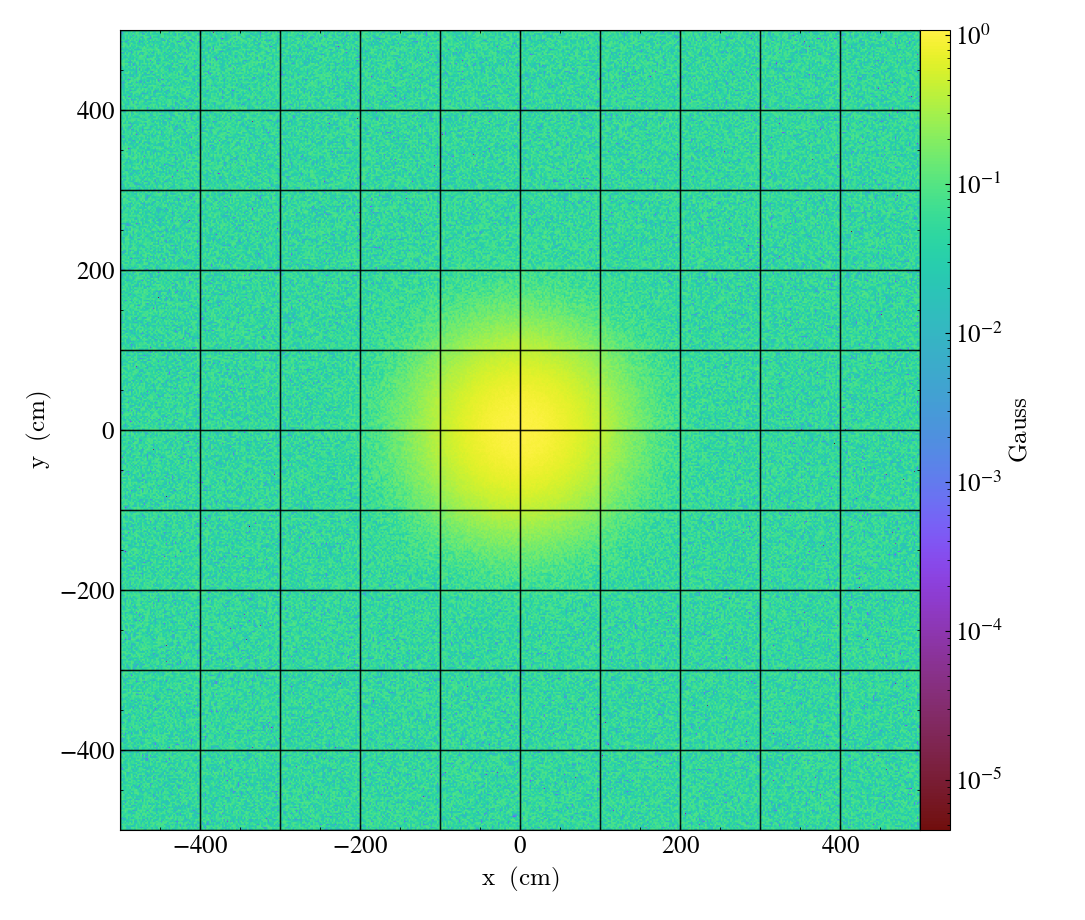

In [56]:
import yt
slc = yt.SlicePlot(yt_ds, "z", ("stream", "gauss"), center = ds_yt.arr([3., 3., 3.], 'code_length'))
slc.annotate_grids()
slc.show()

**each yt grid = dask chunk = on disk .nc file**

but chunk aligment not gauranteed... 

yt_xarray : [INFO ] 2023-02-22 13:28:02,752:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2023-02-22 13:28:02,753:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt_xarray : [INFO ] 2023-02-22 13:28:02,754:  Constructing a yt chunked grid with 125 chunks.
yt : [INFO     ] 2023-02-22 13:28:02,796 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-02-22 13:28:02,797 Parameters: domain_dimensions         = [510 510 510]
yt : [INFO     ] 2023-02-22 13:28:02,798 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-22 13:28:02,799 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2023-02-22 13:28:02,801 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-02-22 13:28:04,943 xlim = -2.000000 8.000000
yt : [INFO     ] 2023-02-22 13:28:04,943 ylim = -2.000000 8.000000
yt : [INFO     ] 2023-02-22 13:28:04,944 xlim = -2.000000 8.000000
yt : [INFO     ] 2023-0


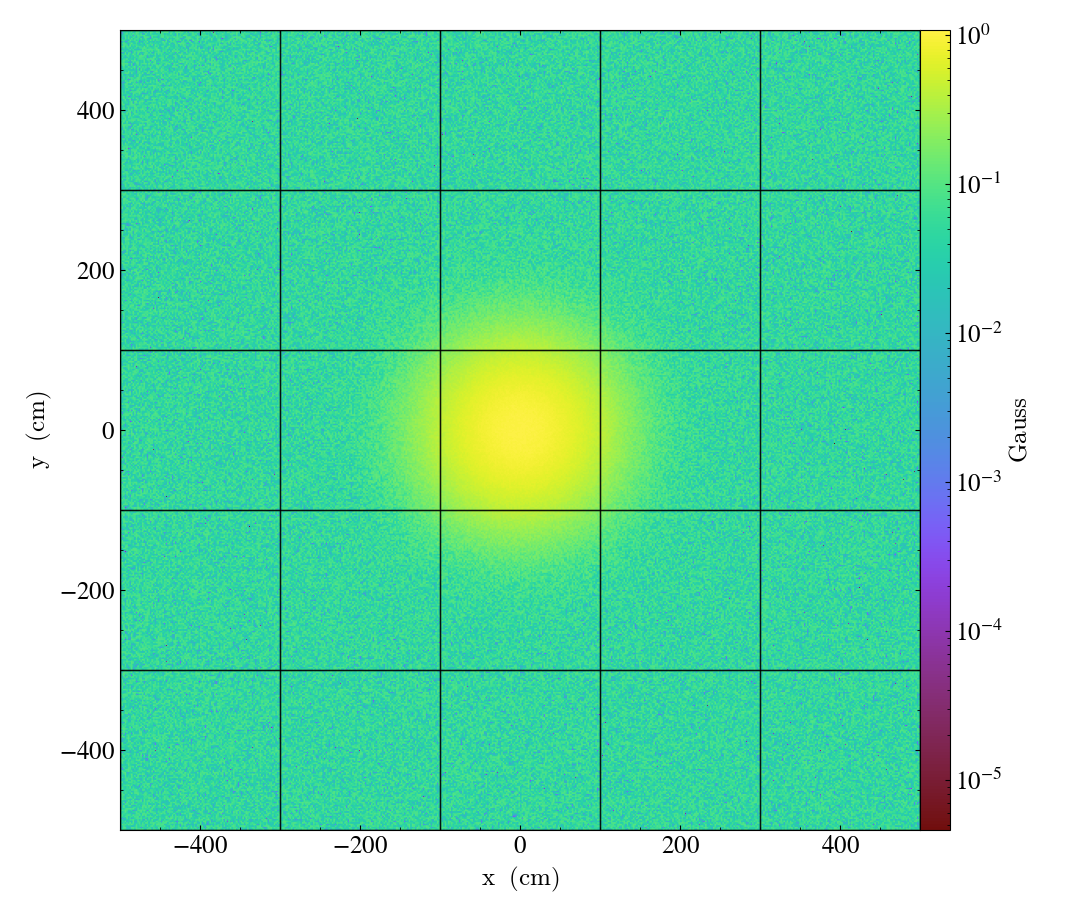

In [57]:
import yt_xarray
yt_ds = ds.yt.load_grid(fields=("gauss",), length_unit='m', chunksizes=102)
slc = yt.SlicePlot(yt_ds, "z", ("stream", "gauss"), center = ds_yt.arr([3., 3., 3.], 'code_length'))
slc.annotate_grids()
slc.show()

possible feature? 

but working to auto-align... 

([ChunkWalker prototype](https://github.com/chrishavlin/yt-xarray-dask-sandbox/blob/main/daxryt/chunk_inspector.py)), `._recursive_chonker` walks dask-xr chunks:


In [59]:
ds.gauss.chunksizes  # dask-related chunk attributes

Frozen({'x': (51, 51, 51, 51, 51, 51, 51, 51, 51, 51), 'y': (51, 51, 51, 51, 51, 51, 51, 51, 51, 51), 'z': (51, 51, 51, 51, 51, 51, 51, 51, 51, 51)})

only have the chunk sizes in each dimension, yt needs the physical left, right edges, potentially cell widths for each chunk.

# possible yt_xarray future

performance-focused:
* auto-alignement of dask and yt chunks
* dedicated frontend instead of stream loaders? 
* improve support for stretched grids: chunking (yt), delayed reads (yt_xarray)

enhancing user experience:
* allow arbitrary coordinate names (yt)
* wrap yt functions?

```python
ds.yt.SlicePlot(normal_axis, fields, ....)
```



# yt_xarray implementation details

loads data as yt Stream frontend via `load_amr_grids`:


```python
yt.load_amr_grids(
        grid_data,  # the data OR FUNCTION for the grid(s)
        data_shp,   # global grid shape, (Nx, Ny, Nz)
        geometry=geom,  # e.g., ('cartesian', ('x', 'z', 'y'))
        bbox=bbox,  # the bounding box
        length_unit=length_unit,  
        **kwargs,
    )
```    

Form of `grid_data` depends on:

* grid type (uniform, stretched)
* memory management: delayed reads (`use_callable`) vs in memory
* chunking

## general outline

```python
ds_xr.yt.load_grid(fields, 
                   sel_dict={'time':0, ...},
                   chunksizes=64, 
                   use_callable=True/False)
```


1. check that fields have valid dims

2. apply the selection dictionary to the field **COORDINATES**, record yt grid details

3. if `use_callable`, initialize the reader function, otherwise read the data fields

4. if chunksizes > 1, split the array (again by **COORDINATES**) and use `load_amr_grids`. otherwise, use `load_uniform_grid`

5. stretched grid corrections...

## code tour (if time)

We'll look at:

* `yt_xarray.accessor.accessor.YtAccessor` : the top level accessor object
* `yt_xarray.accessor._xr_to_yt.Selection` : yt-xr translation, mapping of selections
* `yt_xarray.accessor._readers._get_xarray_reader`: building a function to load the data when needed
